importing the Libraries

In [139]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import os
import seaborn as sns

Downloading dataset from web using yfinance

In [140]:
data = yf.download('KO',start='2015-01-01',end='2025-01-01')
data.reset_index(inplace=True)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.222620,30.409092,29.978773,30.308683,9921100
1,2015-01-05,30.222620,30.817894,30.179590,30.617077,26292600
2,2015-01-06,30.452120,30.796373,30.294339,30.416261,16897500
3,2015-01-07,30.832239,30.918302,30.538189,30.695970,13412300
4,2015-01-08,31.205170,31.248202,30.911120,30.968497,21743600


Basic Information

In [141]:
print("Basic INformation\n\n",data.info())
print()
print("Shape of the dataset:",data.shape)
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)
print()
print("Basic Statictis",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2516 non-null   datetime64[ns]
 1   (Close, KO)   2516 non-null   float64       
 2   (High, KO)    2516 non-null   float64       
 3   (Low, KO)     2516 non-null   float64       
 4   (Open, KO)    2516 non-null   float64       
 5   (Volume, KO)  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
Basic INformation

 None

Shape of the dataset: (2516, 6)
First Data

 Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.222620  30.409092  29.978773  30.308683   9921100
1      2015-01-05  30.222620  30.817894  30.179590  30.617077  26292600
2      2015-01-06  30.452120  30.796373  30.294339  30.416261  1

Checking for missing values

In [142]:
data.isnull().sum()

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64

Feature Addition

In [143]:
data['Differcence per day'] = data['High'] - data['Low']
data.columns = data.columns.get_level_values(0)
# data['Differcence per day'].head()
data['Upper wick'] = data['High'] - data[['Open', 'Close']].max(axis=1)
data['Lower wick'] = data[['Open', 'Close']].min(axis=1) - data['Low']
data['Avg Growth'] = ((data['Low']+data['High']+data["Close"]+data['Open'])/4)*data['Volume']
print(data.columns.tolist())



['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Differcence per day', 'Upper wick', 'Lower wick', 'Avg Growth']


Open vs Close Price

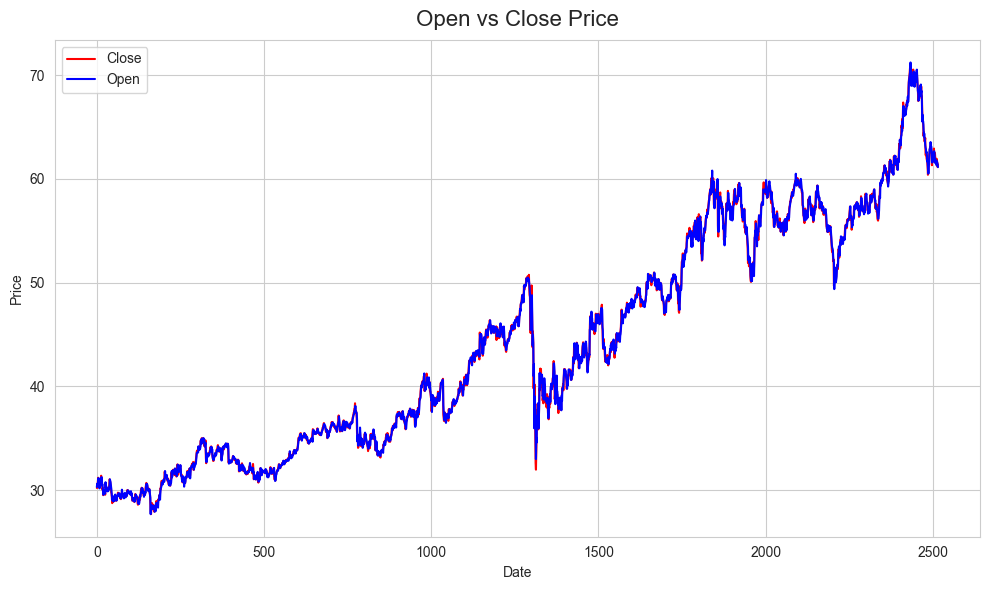

In [144]:

sns.set_style('whitegrid')  # Optional: better visuals
plt.figure(figsize=(10, 6))  # Larger size

sns.lineplot(data=data['Close'], color='red',label='Close')
sns.lineplot(data=data['Open'], color='blue', label='Open')

plt.legend()
plt.title('Open vs Close Price',fontsize=16,pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open vs Close Price.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')

Open_vs_Close_Price_Last_Year

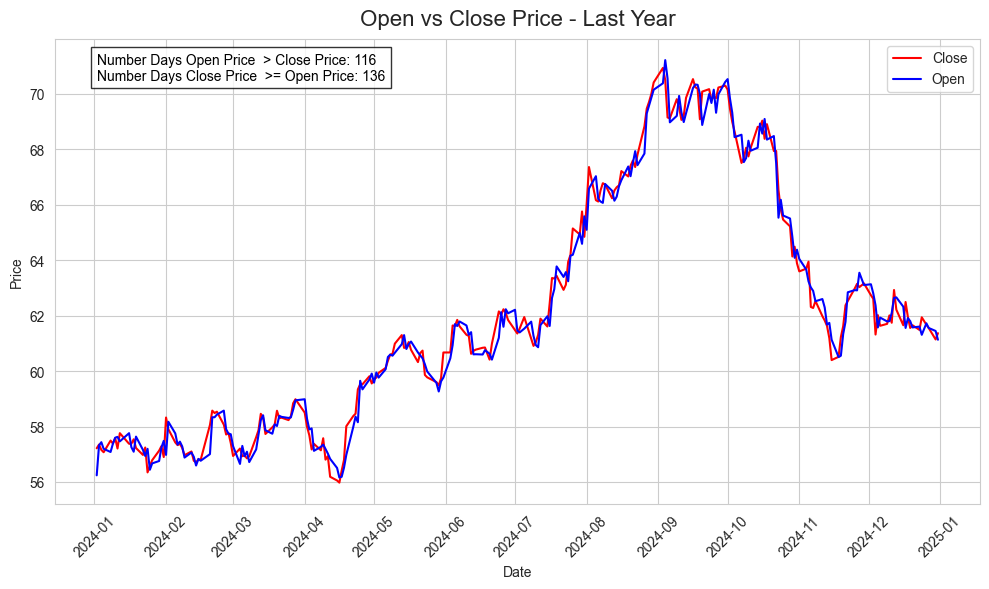

Days Open > Close: 116
Days Close >= Open: 136


In [145]:
# Filter last year
lastyear = data.loc[data['Date'] >= data['Date'].max() - pd.DateOffset(years=1)]

# Count days where Open > Close
open_count, close_count = 0, 0
open_greater_dates = []
open_greater_values = []
for index, row in lastyear.iterrows():
    if row['Open'] > row['Close']:
        open_count += 1
        open_greater_dates.append(row['Date'])
        open_greater_values.append((row['Open'], row['Close']))
    else:
        close_count += 1

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=lastyear, color='red', label='Close')
sns.lineplot(x='Date', y='Open', data=lastyear, color='blue', label='Open')

# Annotate a few points where Open > Close (to avoid clutter, limit to first 3)

# Add summary text for open/close counts
plt.text(
    x=lastyear['Date'].min(),  # Place at the start of the x-axis
    y=lastyear[['Open', 'Close']].max().max()*0.99,  # Near top of y-axis
    s=f'Number Days Open Price  > Close Price: {open_count}\nNumber Days Close Price  >= Open Price: {close_count}',
    fontsize=10,
    color='black',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Labels
plt.title('Open vs Close Price - Last Year', fontsize=16, pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Save and show
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open_vs_Close_Price_Last_Year.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Days Open > Close: {open_count}")
print(f"Days Close >= Open: {close_count}")

Top 10 Day with Difference between High and Low Prices per day

<function matplotlib.pyplot.show(close=None, block=None)>

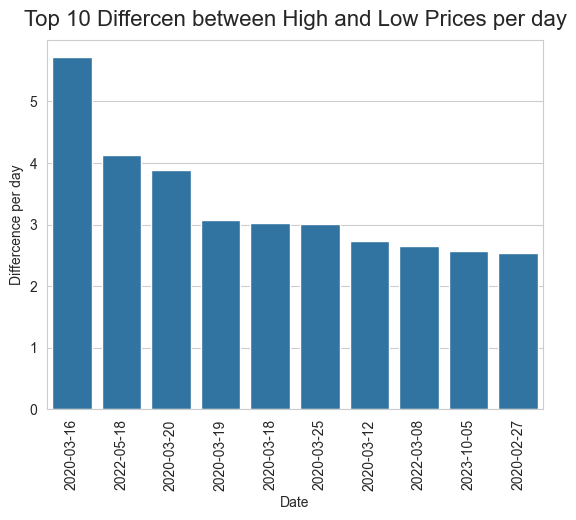

In [146]:
top10 = data.sort_values(by='Differcence per day',ascending=False).head(10)
sns.set_style('whitegrid')
plt.Figure(figsize=(5,5))
plt.title("Top 10 Differcen between High and Low Prices per day",fontsize=16,pad=10)

sns.barplot(data=top10,x=top10['Date'], y = top10['Differcence per day'])
plt.xticks(rotation=90)
output_path = os.path.join('Output Images', 'Top 10 Day with Difference between High and Low Prices per day.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show

Average High per Year by Quarter (2020–2025)

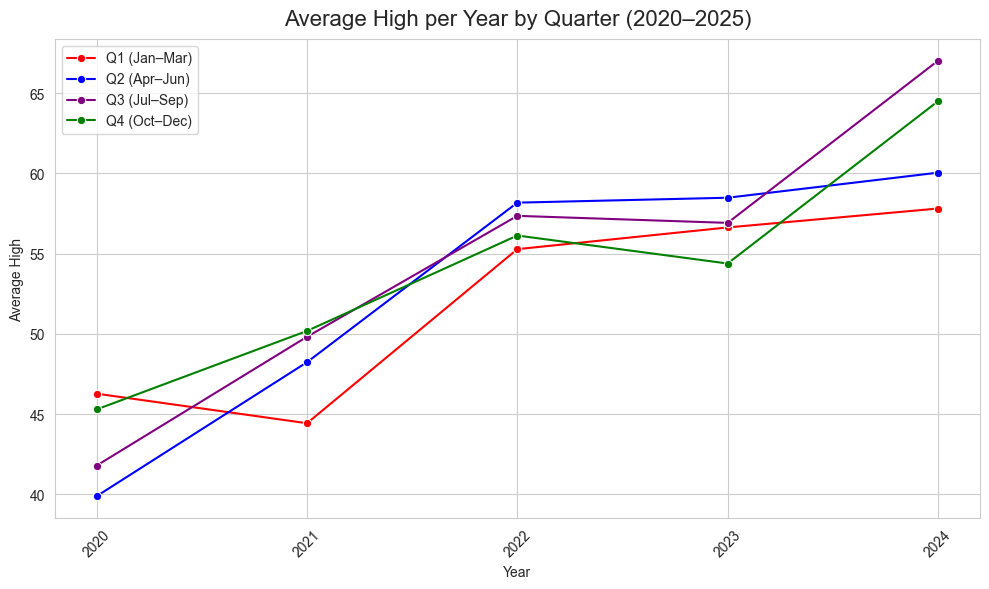

In [147]:
# Assuming your DataFrame is named 'data' and 'Date' column is already in datetime format.

# Q1: Jan–Mar
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q1 = Q1.groupby(Q1['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q1.columns = ['Year', 'High']

# Q2: Apr–Jun
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = Q2.groupby(Q2['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q2.columns = ['Year', 'High']

# Q3: Jul–Sep
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = Q3.groupby(Q3['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q3.columns = ['Year', 'High']

# Q4: Oct–Dec
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = Q4.groupby(Q4['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q4.columns = ['Year', 'High']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='High', data=Q1, marker='o', color='red', label='Q1 (Jan–Mar)')
sns.lineplot(x='Year', y='High', data=Q2, marker='o', color='blue', label='Q2 (Apr–Jun)')
sns.lineplot(x='Year', y='High', data=Q3, marker='o', color='purple', label='Q3 (Jul–Sep)')
sns.lineplot(x='Year', y='High', data=Q4, marker='o', color='green', label='Q4 (Oct–Dec)')

plt.title('Average High per Year by Quarter (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('Average High')
plt.xticks(Q1['Year'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = os.path.join('Output Images', 'Average High per Year by Quarter (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

Quarterly High Prices (2020–2025)

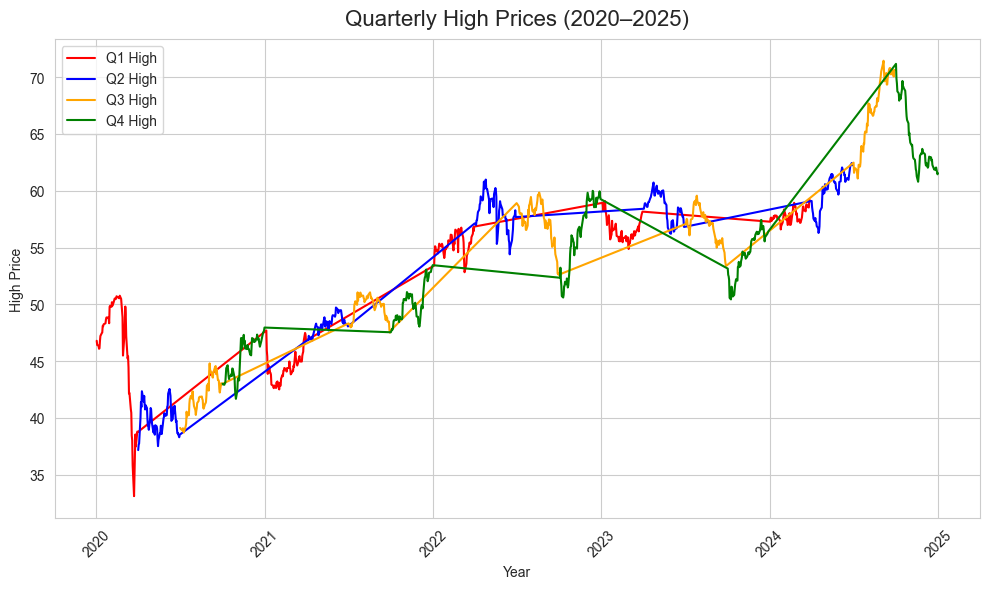

In [148]:

# Filter each quarter between 2020 and 2025
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quarter
sns.lineplot(x='Date', y='High', data=Q1, ax=ax, color='red', label='Q1 High')
sns.lineplot(x='Date', y='High', data=Q2, ax=ax, color='blue', label='Q2 High')
sns.lineplot(x='Date', y='High', data=Q3, ax=ax, color='orange', label='Q3 High')
sns.lineplot(x='Date', y='High', data=Q4, ax=ax, color='green', label='Q4 High')

# Formatting the X-axis with year only
ax.xaxis.set_major_locator(pltdates.YearLocator())
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Labels and title
plt.title('Quarterly High Prices (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('High Price')
plt.legend()
plt.tight_layout()

# Save the plot
output_path = os.path.join('Output Images', 'Quarterly High Prices (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()


Small Moving Averages

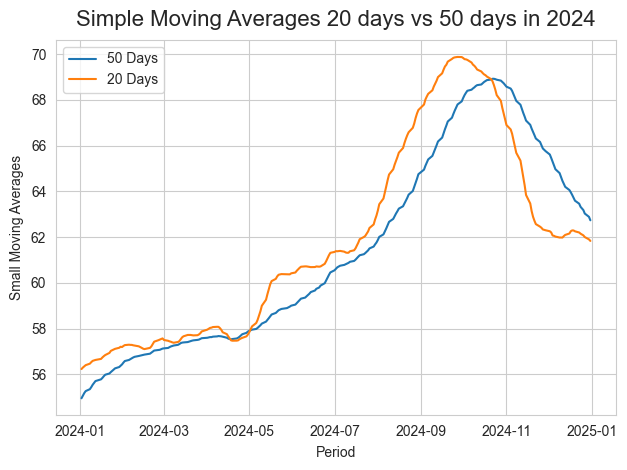

In [149]:
data["SMA_50"] = data['Close'].rolling(window=50).mean()
data["SMA_20"] = data['Close'].rolling(window=20).mean()
db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]
sns.lineplot(data=db,x=db['Date'],y=db['SMA_50'],label="50 Days")
sns.lineplot(data=db,x=db['Date'],y=db['SMA_20'],label="20 Days")

plt.title("Simple Moving Averages 20 days vs 50 days in 2024" ,fontsize=16,pad=10)
plt.xlabel('Period',fontsize=10,labelpad=5)
plt.ylabel('Small Moving Averages',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()
plt.show()



bollinger bands

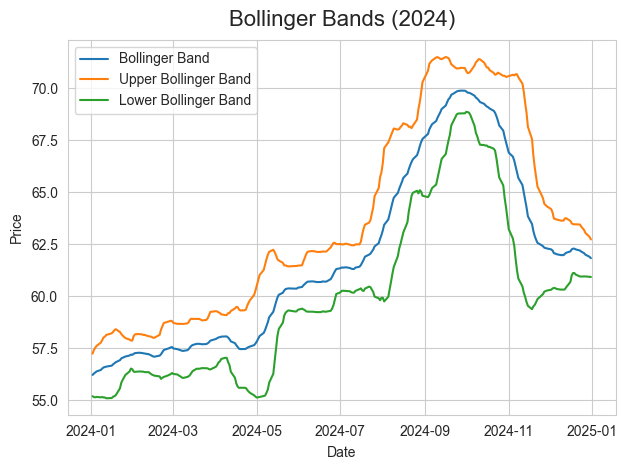

In [150]:
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + (data['BB_std'] * 2)
data['BB_Lower'] = data['BB_Middle'] - (data['BB_std'] * 2)

db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(data=db ,x=db['Date'],y=db['BB_Middle'],label='Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Upper'],label='Upper Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Lower'],label='Lower Bollinger Band')

plt.title('Bollinger Bands (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('Price',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()

output_path = os.path.join('Output Images', "bollinger_bands_2024.png")
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

RSI Indicator (2024)

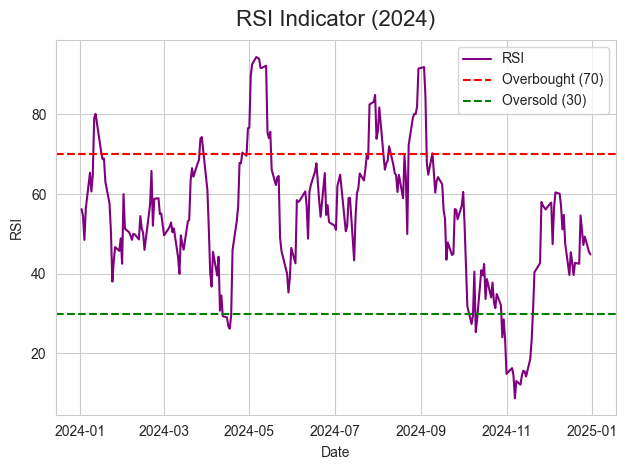

In [151]:
def cal_rsi(data,peroid=14):
    delta=data["Close"].diff()
    gain = (delta.where(delta>0,0)).fillna(0)
    loss = (-delta.where(delta<0,0)).fillna(0)
    
    avg_gain = gain.rolling(window=peroid).mean()
    avg_loss = loss.rolling(window=peroid).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 -(100/(1+rs))
    data['RSI'] = rsi
    return data

data = cal_rsi(data)
rsi_data = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(x='Date', y='RSI', data=rsi_data, color='purple', label='RSI')
plt.title('RSI Indicator (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('RSI',fontsize=10,labelpad=5)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.tight_layout()
plt.legend()

plt.savefig("Output Images/rsi_2024.png",dpi=300,bbox_inches='tight')
plt.show()

Comparison PepsiCo , Monster Beverage with Coca-Cola

In [152]:
# PepsiCo
data1 = yf.download('PEP',start='2015-01-01',end='2025-01-01')
data1.reset_index(inplace=True)
data1.head()
print("Num value Count for Pepsico :",data1.isnull().sum())
# Monster Beverage
data2 = yf.download('MNST',start='2015-01-01',end='2025-01-01')
data2.reset_index(inplace=True)
data2.head()
print("Num value Count for Monster Beverage :",data2.isnull().sum())
data1.columns = data1.columns.get_level_values(0)
data2.columns = data2.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Num value Count for Pepsico : Price   Ticker
Date              0
Close   PEP       0
High    PEP       0
Low     PEP       0
Open    PEP       0
Volume  PEP       0
dtype: int64
Num value Count for Monster Beverage : Price   Ticker
Date              0
Close   MNST      0
High    MNST      0
Low     MNST      0
Open    MNST      0
Volume  MNST      0
dtype: int64


Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing)

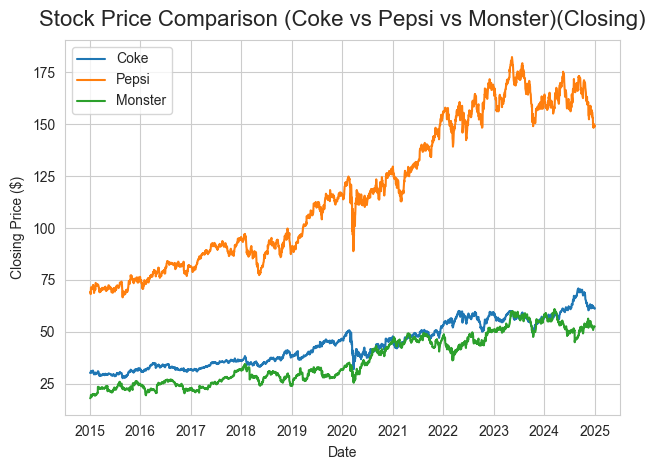

<Figure size 640x480 with 0 Axes>

In [153]:
sns.lineplot(data=data, x='Date', y='Close', label="Coke")
sns.lineplot(data=data1, x='Date', y='Close', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Close', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Closing Price ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# print(data['Close'].shape) 
# print(data1['Close'].shape) 
# print(data2['Close'].shape) 

plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing).png",dpi=300,bbox_inches='tight')
plt.show()

Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening)

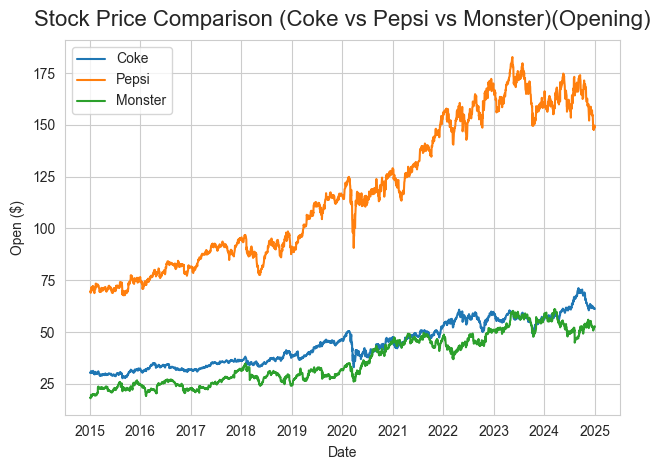

In [154]:
sns.lineplot(data=data, x='Date', y='Open', label="Coke")
sns.lineplot(data=data1, x='Date', y='Open', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Open', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Open ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening).png",dpi=300,bbox_inches='tight')
plt.show()


Quaterly Performace of three companies

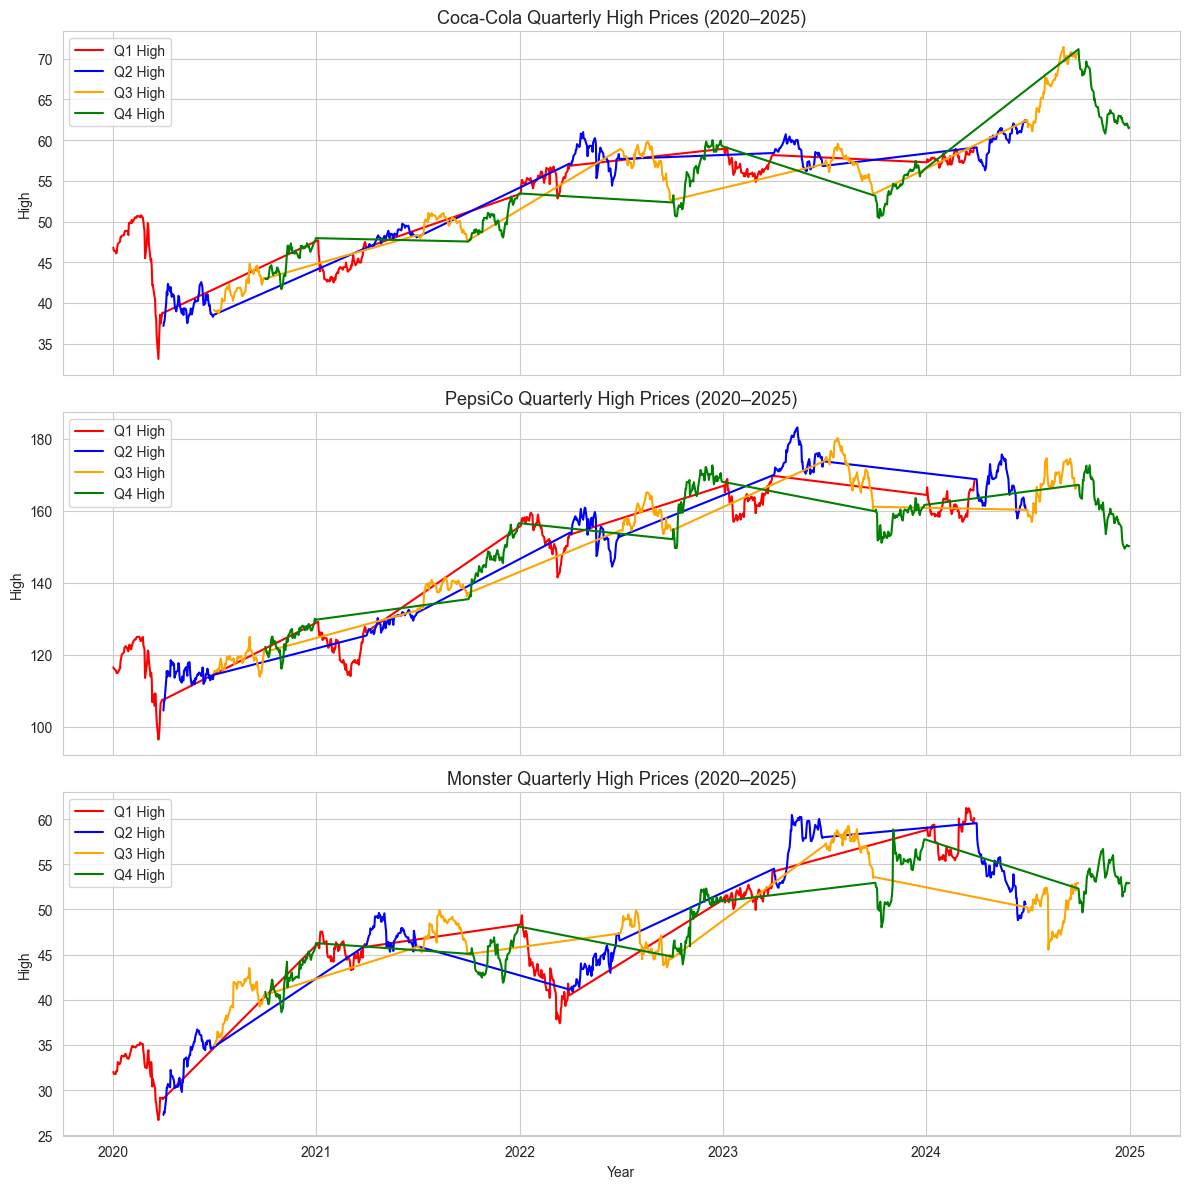

In [155]:
# Function to split quarters
def split_quarters(df):
    df = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2025)]
    quarters = {
        'Q1': df[df['Date'].dt.month.isin([1, 2, 3])],
        'Q2': df[df['Date'].dt.month.isin([4, 5, 6])],
        'Q3': df[df['Date'].dt.month.isin([7, 8, 9])],
        'Q4': df[df['Date'].dt.month.isin([10, 11, 12])]
    }
    return quarters

# Split data for Coca-Cola, Pepsi, Monster
quarters_coke = split_quarters(data)
quarters_pepsi = split_quarters(data1)
quarters_monster = split_quarters(data2)

# Colors for quarters
colors = {'Q1': 'red', 'Q2': 'blue', 'Q3': 'orange', 'Q4': 'green'}

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
companies = [('Coca-Cola', quarters_coke), ('PepsiCo', quarters_pepsi), ('Monster', quarters_monster)]

for ax, (title, quarters) in zip(axes, companies):
    for q, df in quarters.items():
        sns.lineplot(x='Date', y='High', data=df, ax=ax, label=f'{q} High', color=colors[q])
    ax.set_title(f'{title} Quarterly High Prices (2020–2025)', fontsize=13)
    ax.xaxis.set_major_locator(pltdates.YearLocator())
    ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
    ax.legend()

# Final layout
plt.xlabel('Year')
plt.savefig("Output Images/Quaterly Performace of three companies.png",dpi=300,bbox_inches='tight')
plt.tight_layout()

In [156]:
feature = ['Open','High','Low','Volume']
data["Target"] = data['Close'].shift(-1)
data = data[:-1]
data[feature + ['Close','Target']].head()

Price,Open,High,Low,Volume,Close,Target
0,30.308683,30.409092,29.978773,9921100,30.222620,30.222620
1,30.617077,30.817894,30.179590,26292600,30.222620,30.452120
2,30.416261,30.796373,30.294339,16897500,30.452120,30.832239
3,30.695970,30.918302,30.538189,13412300,30.832239,31.205170
4,30.968497,31.248202,30.911120,21743600,31.205170,30.860924


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [158]:
X = data[feature]
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.2)

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

print("Mean error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean error: 0.4028262947055972
Root Mean Squared Error (RMSE): 0.5238252923160427
R² Score: 0.9860187938761762


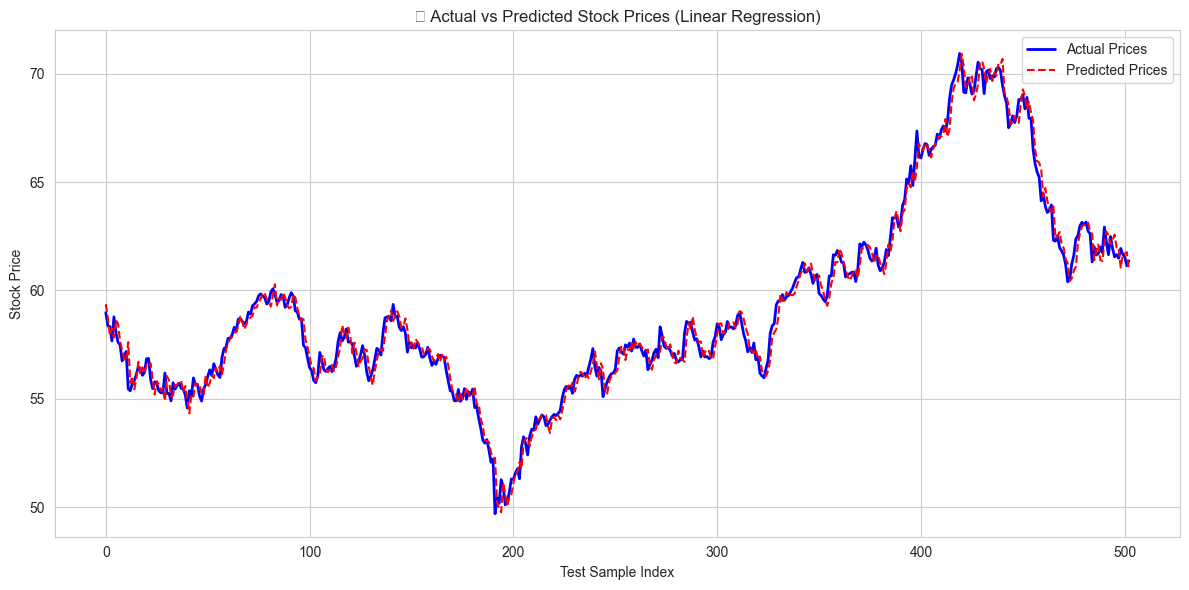

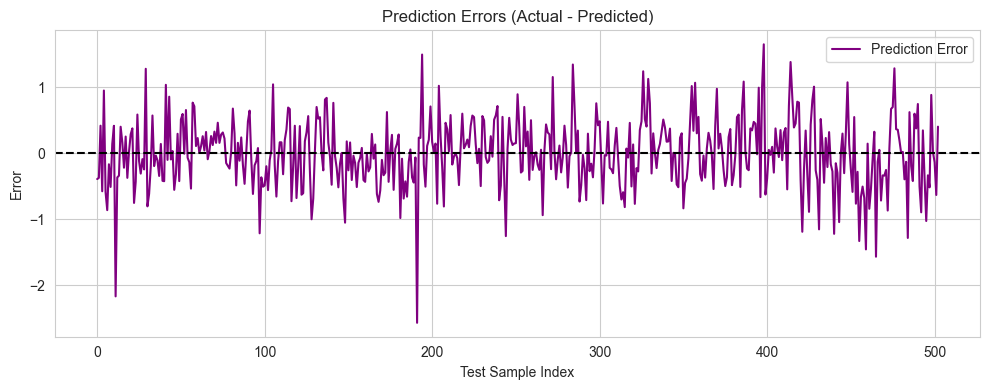

In [159]:

# Line plot of actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('📈 Actual vs Predicted Stock Prices (Linear Regression)')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Plot the prediction error
errors = y_test.values - y_pred
plt.figure(figsize=(10, 4))
plt.plot(errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Test Sample Index')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()


In [160]:
data4 = yf.download('KO',start='2025-01-01',end='2025-07-01')
data4.reset_index(inplace=True)
data4.head()
data4.columns = data4.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


In [161]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)

data4['Year'] = data4['Date'].dt.year
data4['Month'] = data4['Date'].dt.month
data4['Day'] = data4['Date'].dt.day
data4['DayOfYear'] = data4['Date'].dt.dayofyear
data4['Week'] = data4['Date'].dt.isocalendar().week.astype(int)

In [162]:
feature_cols = ['Year', 'Month', 'Day', 'DayOfYear', 'Week']

train_data = data[data['Date'] < '2025-01-01']
test_data = data4[data4['Date'] < '2025-07-01' ]


X_train = train_data[feature_cols]
y_train = train_data['Close']

X_test = test_data[feature_cols]
y_test = test_data['Close']

In [163]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 9.70430549246366
RMSE: 10.251904190114805
R² Score: -6.335805545048821


In [164]:
# Combine data before splitting
full_data = pd.concat([data, data4], ignore_index=True)

# Sort by Date
full_data['Date'] = pd.to_datetime(full_data['Date'])  # Ensure datetime format
full_data.sort_values('Date', inplace=True)

# Generate features on full combined dataset
full_data['Prev_Close'] = full_data['Close'].shift(1)
full_data['MA5'] = full_data['Close'].rolling(window=5).mean()
full_data['MA20'] = full_data['Close'].rolling(window=20).mean()
full_data['MA50'] = full_data['Close'].rolling(window=50).mean()
full_data['Return'] = full_data['Close'].pct_change()
full_data['Volatility'] = full_data['Return'].rolling(window=10).std()

# Drop rows with missing values (due to rolling)
selected_cols = [
    'Date', 'Close',              # target + time
    'Prev_Close', 'MA5', 'MA20', 'MA50', 'Return', 'Volatility',  # features                    # optional
]

full_data = full_data[selected_cols]
full_data.dropna(inplace=True)

# ✅ Updated date split (we use 2024 instead of 2025 since your data ends at 2024-12-30)
train_data = full_data[full_data['Date'] < '2025-01-01']
test_data = full_data[full_data['Date'] >= '2025-01-01']

# Define feature columns
feature_cols = ['Prev_Close', 'MA5', 'MA20', 'MA50', 'Return', 'Volatility']

X_train = train_data[feature_cols]
y_train = train_data['Close']

X_test = test_data[feature_cols]
y_test = test_data['Close']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.9599880650004408
RMSE: 1.2611578079491692
R² Score: 0.8889860388911274


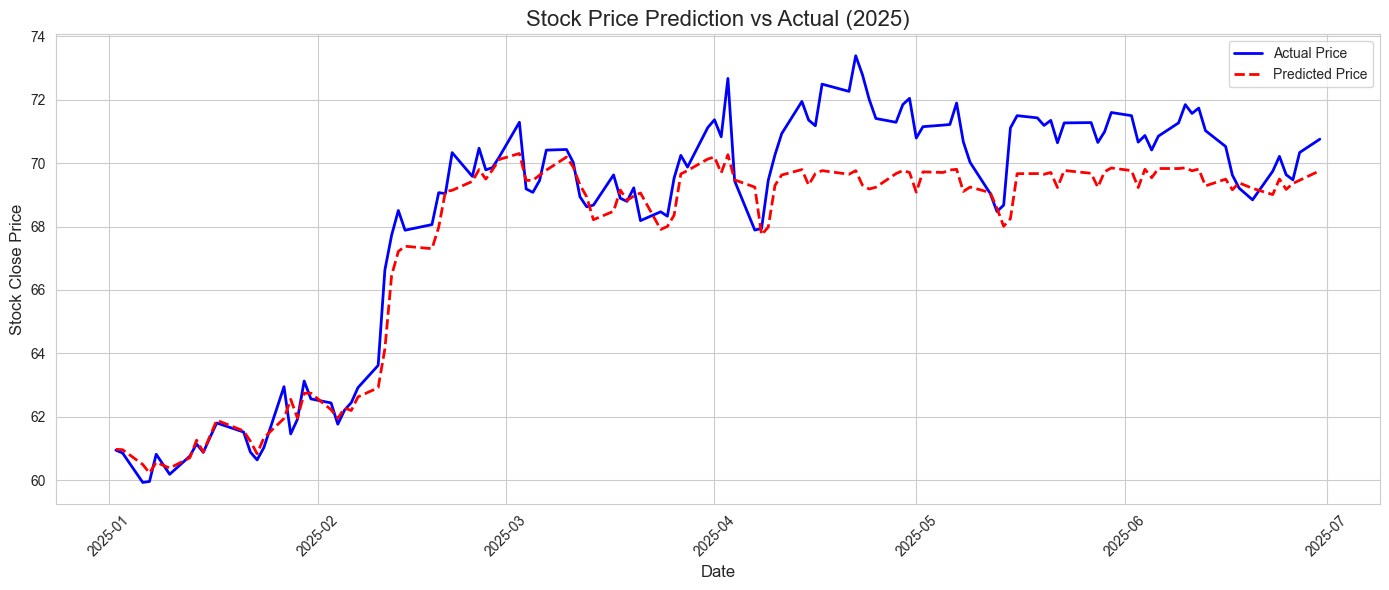

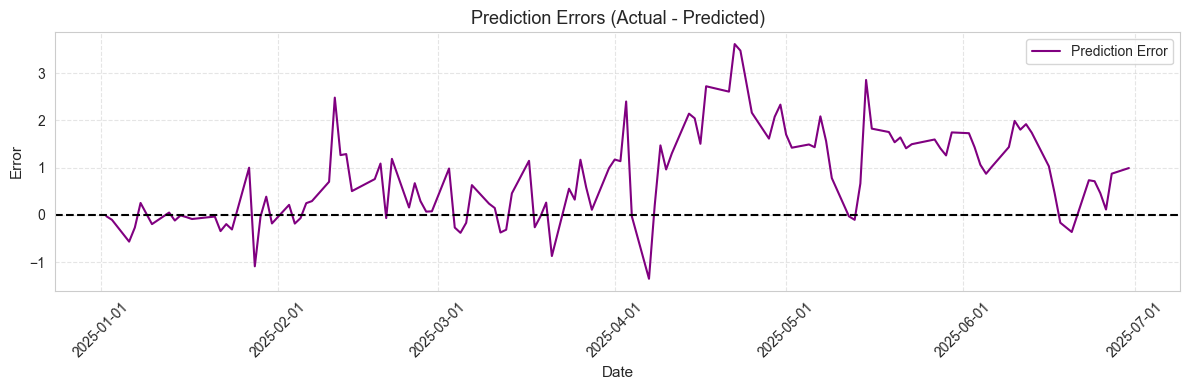

In [ ]:


# Make sure y_test uses Date as its index (optional but helps if you're plotting y_test alone)
y_test.index = test_data['Date']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_data['Date'], y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred, label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Formatting
plt.title('Stock Price Prediction vs Actual (2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Optional: Format date x-axis for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# --- Prediction Error Plot ---
errors = y_test.values - y_pred
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title('Prediction Errors (Actual - Predicted)', fontsize=13)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Error', fontsize=11)

# Format the date ticks
plt.gca().xaxis.set_major_locator(pltdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Changing to XGBoost

In [97]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    gamma=0.1,
    min_child_weight=3,
    random_state=42,
    early_stopping_rounds=10  # Move early_stopping_rounds here
)

model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)


# Predict
y_pred = model.predict(X_test_scaled)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.9599508066646388
RMSE: 1.2551281810211168
R² Score: 0.890045022344478


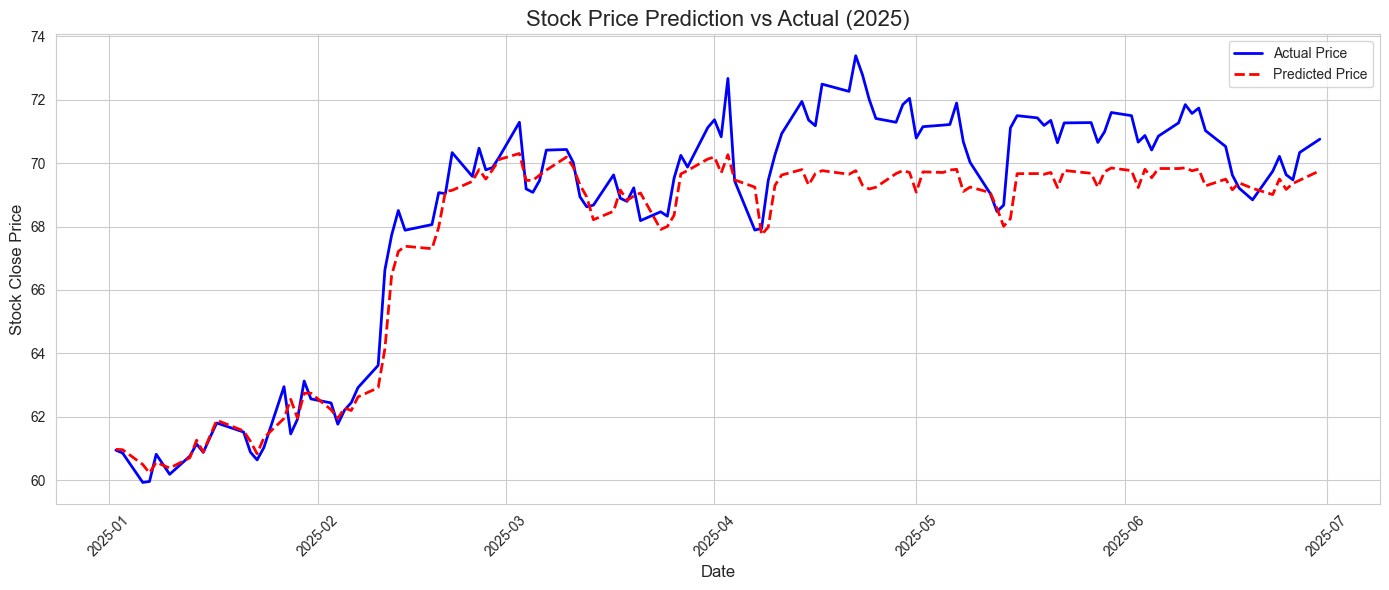

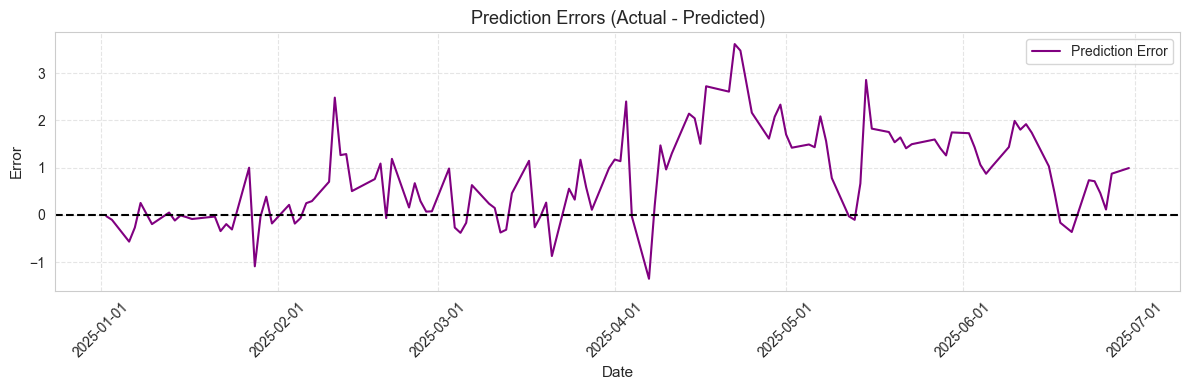

In [170]:


# Make sure y_test uses Date as its index (optional but helps if you're plotting y_test alone)
y_test.index = test_data['Date']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_data['Date'], y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred, label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Formatting
plt.title('Stock Price Prediction vs Actual (2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Optional: Format date x-axis for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# --- Prediction Error Plot ---
errors = y_test.values - y_pred
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, errors, label='Prediction Error', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title('Prediction Errors (Actual - Predicted)', fontsize=13)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Error', fontsize=11)

# Format the date ticks
plt.gca().xaxis.set_major_locator(pltdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


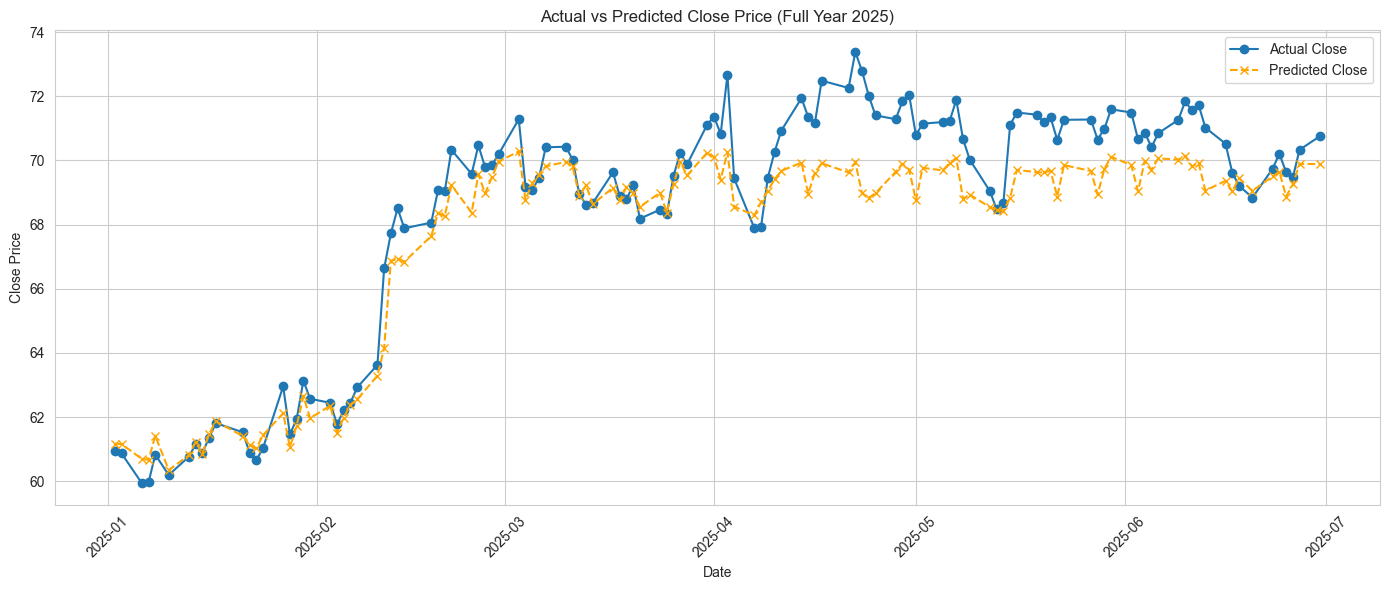

In [100]:
import matplotlib.pyplot as plt

# Copy test data and attach predictions
test_data = test_data.copy()
test_data['Predicted'] = y_pred

# Filter from 2025-01-01 to 2025-12-31
mask_2025 = (test_data['Date'] >= '2025-01-01') & (test_data['Date'] <= '2025-12-31')
plot_data = test_data.loc[mask_2025]

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(plot_data['Date'], plot_data['Close'], label='Actual Close', marker='o')
plt.plot(plot_data['Date'], plot_data['Predicted'], label='Predicted Close', linestyle='--', marker='x', color='orange')

plt.title('Actual vs Predicted Close Price (Full Year 2025)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
